In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
from math import sqrt
from sklearn.metrics import mean_squared_error

# Data Loading and pre-processing

In [2]:
# Loading dataset

df_total = pd.read_csv("/home/exalis/VELIB-DATA/SIMPLE DATASET/Simple_Dataset_2020_01_29.csv")

In [3]:
df_total.head()

,Unnamed: 0,availiable_docks,date,station_name,weekday
0,0,33,2020-01-15 10:17:00,Benjamin Godard - Victor Hugo,Wednesday
1,1,53,2020-01-15 10:17:00,André Mazet - Saint-André des Arts,Wednesday
2,2,19,2020-01-15 10:17:00,Toudouze - Clauzel,Wednesday
3,3,19,2020-01-15 10:17:00,Charonne - Robert et Sonia Delauney,Wednesday
4,4,27,2020-01-15 10:17:00,Mairie du 12ème,Wednesday


In [4]:
# Taking only station "Godot de Mauroy - Madeleine"
df_case = df_total[df_total["station_name"]=="Godot de Mauroy - Madeleine"]

In [5]:
df_case.head()

,Unnamed: 0,availiable_docks,date,station_name,weekday
979,979,8,2020-01-15 10:17:00,Godot de Mauroy - Madeleine,Wednesday
2372,2372,8,2020-01-15 10:18:00,Godot de Mauroy - Madeleine,Wednesday
3765,3765,7,2020-01-15 10:19:00,Godot de Mauroy - Madeleine,Wednesday
5158,5158,8,2020-01-15 10:20:00,Godot de Mauroy - Madeleine,Wednesday
6551,6551,8,2020-01-15 10:21:00,Godot de Mauroy - Madeleine,Wednesday


In [31]:
df_case["weekday"]  = df_case["date"].apply(lambda x: pd.Timestamp(x).day_name())

/home/exalis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_case["hour"] = df_case["date"].apply(lambda x: pd.Timestamp(x).hour)

In [9]:
df_case = df_case.reset_index(drop=True)

In [10]:
df_case = df_case[["availiable_docks","date","weekday","hour"]]
df_case = df_case.reset_index(drop=True)

In [11]:
df_case.head()

,availiable_docks,date,weekday,hour
0,8,2020-01-15 10:17:00,Wednesday,10
1,8,2020-01-15 10:18:00,Wednesday,10
2,7,2020-01-15 10:19:00,Wednesday,10
3,8,2020-01-15 10:20:00,Wednesday,10
4,8,2020-01-15 10:21:00,Wednesday,10


In [44]:
df_case["weekday"].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [12]:
# Filter only on days of the week

df_case = df_case[(df_case["weekday"] == 'Monday') |
        (df_case["weekday"] == 'Tuesday') |
        (df_case["weekday"] == 'Wednesday') |
        (df_case["weekday"] == 'Thursday') |
        (df_case["weekday"] == 'Friday')]
df_case = df_case.reset_index(drop=True)

In [13]:
df_case

,availiable_docks,date,weekday,hour
0,8,2020-01-15 10:17:00,Wednesday,10
1,8,2020-01-15 10:18:00,Wednesday,10
2,7,2020-01-15 10:19:00,Wednesday,10
3,8,2020-01-15 10:20:00,Wednesday,10
4,8,2020-01-15 10:21:00,Wednesday,10
...,...,...,...,...
14795,20,2020-01-30 00:15:00,Thursday,0
14796,20,2020-01-30 00:16:00,Thursday,0
14797,20,2020-01-30 00:17:00,Thursday,0
14798,20,2020-01-30 00:18:00,Thursday,0


In [14]:
#df_case = pd.read_csv("/home/exalis/Téléchargements/BACKUP/Madeleine_test.csv")
df_case.to_csv("/home/exalis/VELIB-DATA/SIMPLE DATASET/madeleine_weekday.csv")

# Trying on part of the dataset

In [6]:
df_case = pd.read_csv("https://raw.githubusercontent.com/alexisgcomte/velib-prediction/master/3.%20Modeling%20Research/datasets/madeleine_weekday.csv")

In [7]:
#df_morning = df_case[df_case["hour"]==8].append(df_case[df_case["hour"]==9])
df_morning = df_case[df_case["hour"]==8]
df_morning=df_morning.sort_values(by="date")
df_morning= df_morning.reset_index(drop=True)

In [8]:
df_morning.head()

,Unnamed: 0,availiable_docks,date,weekday,hour
0,1220,17,2020-01-16 08:00:00,Thursday,8
1,1221,17,2020-01-16 08:01:00,Thursday,8
2,1222,17,2020-01-16 08:02:00,Thursday,8
3,1223,17,2020-01-16 08:03:00,Thursday,8
4,1224,18,2020-01-16 08:04:00,Thursday,8


In [9]:
# Saving time for later
save_time = df_morning.date

In [10]:
# Removing all useless columns
dataset = np.array(df_morning["availiable_docks"])

In [11]:
dataset[0:10]

array([17, 17, 17, 17, 18, 16, 16, 16, 16, 16])

In [12]:
df_morning

,Unnamed: 0,availiable_docks,date,weekday,hour
0,1220,17,2020-01-16 08:00:00,Thursday,8
1,1221,17,2020-01-16 08:01:00,Thursday,8
2,1222,17,2020-01-16 08:02:00,Thursday,8
3,1223,17,2020-01-16 08:03:00,Thursday,8
4,1224,18,2020-01-16 08:04:00,Thursday,8
...,...,...,...,...,...
595,13875,7,2020-01-29 08:55:00,Wednesday,8
596,13876,7,2020-01-29 08:56:00,Wednesday,8
597,13877,6,2020-01-29 08:57:00,Wednesday,8
598,13878,6,2020-01-29 08:58:00,Wednesday,8


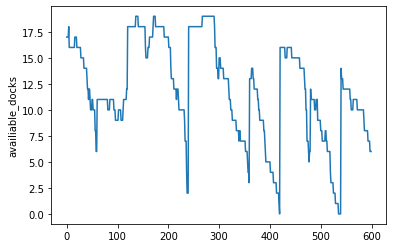

In [13]:
_ = sns.lineplot(data=df_morning,x=df_morning.index, y="availiable_docks")

In [14]:
# Variable definition
split_ratio = 6/7

In [15]:
# Doing a slit of aust between train and test
train = dataset[0:int(round(len(dataset)*split_ratio,0))]
test = dataset[int(round(len(dataset)*split_ratio,0)):]

In [16]:
print("Length of dataset:", len(dataset))
print("Length of train:", len(train))
print("Length of test:", len(test))
print("Check:", len(dataset)-len(train)-len(test))

Length of dataset: 600
Length of train: 514
Length of test: 86
Check: 0


# Modelling

In [17]:
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [18]:
# OK
# create a set of exponential smoothing configs to try
def exp_smoothing_configs(seasonal=[None]):
    models = list()
    # define config lists
    t_params = ['add', 'mul', 'additive', None]
    d_params = [True, False]
    s_params = ['add', 'mul', 'additive', None]
    p_params = seasonal
    b_params = [True, False]
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            cfg = [t,d,s,p,b,r]
                            models.append(cfg)
    return models

In [19]:
# Creating list of configuration possible
cfg_list = exp_smoothing_configs(seasonal=[60])

# Sample
cfg_list[:5]

[['add', True, 'add', 60, True, True],
 ['add', True, 'add', 60, True, False],
 ['add', True, 'add', 60, False, True],
 ['add', True, 'add', 60, False, False],
 ['add', True, 'mul', 60, True, True]]

In [20]:
# one-step Holt Winters Exponential Smoothing forecast
def exp_smoothing_forecast_grid_search(train, test, configurations):
    best_config = ""
    best_rmse = 99999
    for i in range(len(configurations)):
        try:
            t,d,s,p,b,r = configurations[i]
            # define model
            model = ExponentialSmoothing(train, trend=t, damped=d, seasonal=s, seasonal_periods=p).fit(optimized=True,use_boxcox=b,remove_bias=r)
            # fit model
            # make one step forecast
            pred = model.predict(start=len(train),end=len(test)+len(train)-1)
            temp_indicator = measure_rmse(test,pred)
            if temp_indicator < best_rmse:
                best_rmse = temp_indicator
                best_config = configurations[i]
        except:
            pass
    print(best_config)
    print(best_rmse)
    return(best_config)

In [21]:
# one-step Holt Winters Exponential Smoothing forecast, sur tout le train
def exp_smoothing_forecast_grid_search(train, test, configurations):
    best_config = ""
    best_rmse = 99999
    for i in range(len(configurations)):
        try:
            t,d,s,p,b,r = configurations[i]
            # define model
            model = ExponentialSmoothing(train, trend=t, damped=d, seasonal=s, seasonal_periods=p).fit(optimized=True,use_boxcox=b,remove_bias=r)
            # fit model
            # make one step forecast
            pred = model.predict(start=1,end=len(train))
            temp_indicator = measure_rmse(train,pred)
            if temp_indicator < best_rmse:
                best_rmse = temp_indicator
                best_config = configurations[i]
        except:
            pass
    print(best_config)
    print(best_rmse)
    return(best_config)

In [22]:
best_parameters = exp_smoothing_forecast_grid_search(train, test, cfg_list)

/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: Converge

['add', False, None, 60, False, False]
0.018111151142148358


/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [23]:
best_parameters

['add', False, None, 60, False, False]

# Best model

In [32]:
train[0]

17

In [55]:
t,d,s,p,b,r = best_parameters

# define model
model = ExponentialSmoothing(train, trend=t, damped=d, seasonal=s, seasonal_periods=p).fit(optimized=True,use_boxcox=b,remove_bias=r)
# make one step forecast
pred = model.predict(len(train)+1, end=(len(train)+len(test)))
temp_indicator = measure_rmse(dataset,pred)
print(temp_indicator)

ValueError: Found input variables with inconsistent numbers of samples: [600, 86]

In [38]:
pd.DataFrame(train)[0]

0      17
1      17
2      17
3      17
4      18
       ..
509     8
510     8
511     7
512     7
513     6
Name: 0, Length: 514, dtype: int64

In [51]:
pred2 = model.predict(start=1, end = len(train)+60)

In [52]:
pd.DataFrame(pred2)

,0
0,17.000000
1,17.000000
2,17.000000
3,17.000000
4,17.986021
...,...
569,6.013981
570,6.013981
571,6.013981
572,6.013981


In [43]:
df = pd.DataFrame(columns=["actual","forecast"])
df.actual = pd.DataFrame(train)[0]
df.forecast = pd.DataFrame(pred)[0]
.append(pd.DataFrame(pred2)[0])
df = df.reset_index(drop=True)
df

ValueError: cannot reindex from a duplicate axis

# Graphic visualisation

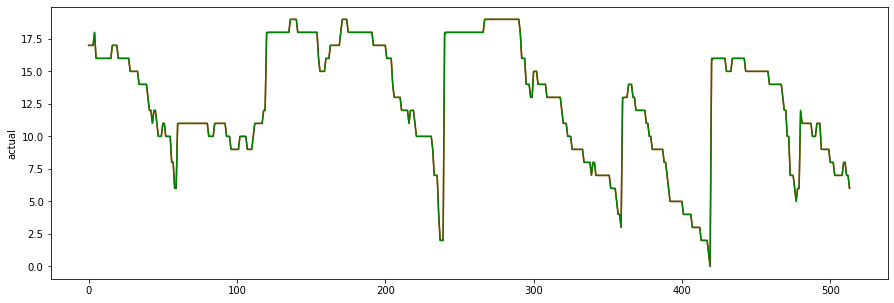

In [40]:
# Creation of a plot // Density level vs average docks

fig, axis = plt.subplots(figsize=(15,5))
sns.lineplot(x=df.index, y="forecast",data=df, color="red")
sns.lineplot(x=df.index, y="actual",data=df, color="green")


plt.show()

- utiliser le moment en semaine
- 